In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 3
MOMENTUM = -0.03
CYCLE = 1000
STEPSIZE = -0.01

In [3]:
def objective(v: np.array) -> np.array:
    return(np.power(v, 2))

In [4]:
def derivative(v: np.array) -> np.array:
    return(np.dot(2, v))

In [5]:
def distance(v: np.array, w: np.array) -> float:
    v = np.subtract(v, w)
    return(np.power((np.dot(v, v)), 0.5))

[ 0.10443415  1.93917636 -5.51776001]
[1.09064917e-02 3.76040496e+00 3.04456755e+01]


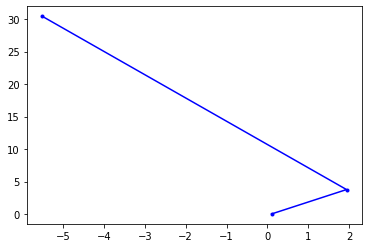

In [6]:
def gradient_step(v: np.array, gradient: np.array, prev_step: np.array):
    #Движемся с шагом step_size в напрвлении градиента "gradient" от "v"
    assert len(v) == len(gradient)
    
    step = np.add(np.dot(STEPSIZE, gradient), np.dot(MOMENTUM, prev_step))
    return([step, np.sum([step, v], axis=0)])


v = np.array([random.uniform(-10, 10) for i in range(X)]) #случайная отправная точка
results = objective(v)
print(v)
print(results)

# create a line plot of input vs result
plt.plot(v, results,  '.-', color='blue')
# show the plot
plt.show()

In [7]:
res = np.empty((0, 3), float)
scores = np.empty((0, 3), float)
prev_step = np.zeros(X)

for epoch in range(CYCLE):
    grad = derivative(v) #вычисляем градиент в v
    step, v = gradient_step(v, grad, prev_step) #делаем отрицательный градиентный шаг с моментной модификацией, берем умереннный
    res = np.append(res, [v], axis=0)
    scores = np.append(scores, [step], axis=0)
    prev_step = step
    print(v)


[ 0.10234547  1.90039283 -5.40740481]
[ 0.10036122  1.86354848 -5.30256737]
[ 0.09841352  1.82738284 -5.19966115]
[ 0.09650368  1.79192016 -5.09875511]
[ 0.0946309   1.75714563 -4.99980719]
[ 0.09279447  1.72304596 -4.90277948]
[ 0.09099367  1.68960803 -4.80763472]
[ 0.08922782  1.65681901 -4.71433637]
[ 0.08749624  1.6246663  -4.6228486 ]
[ 0.08579826  1.59313755 -4.53313626]
[ 0.08413324  1.56222066 -4.4451649 ]
[ 0.08250052  1.53190376 -4.35890074]
[ 0.0808995   1.50217519 -4.27431065]
[ 0.07932954  1.47302354 -4.19136214]
[ 0.07779004  1.44443762 -4.11002336]
[ 0.07628043  1.41640645 -4.03026305]
[ 0.07480011  1.38891925 -3.9520506 ]
[ 0.07334852  1.36196548 -3.87535596]
[ 0.07192509  1.33553479 -3.80014968]
[ 0.07052929  1.30961701 -3.72640288]
[ 0.06916058  1.2842022  -3.65408722]
[ 0.06781843  1.2592806  -3.58317495]
[ 0.06650233  1.23484264 -3.51363882]
[ 0.06521176  1.21087893 -3.44545213]
[ 0.06394625  1.18738026 -3.37858868]
[ 0.06270529  1.16433761 -3.31302281]
[ 0.06148841

In [8]:
print(distance(v, np.zeros(X)) < 0.001)

True


In [9]:
print(distance(v, np.zeros(X))) #минимум функции sum_of_squares находится в нуле, v-min получился 2.30 * 10^(-8) ≈ 0 (0.00000000238...)

1.8028896233651863e-08


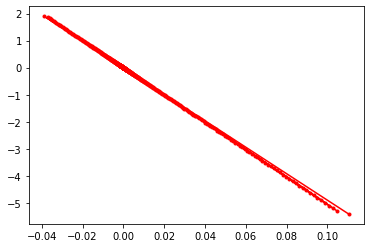

In [10]:
# plot the solutions found
for i in range(CYCLE):
    plt.plot(scores[i], res[i], '.-', color='red')
# show the plot
plt.show()